In [ ]:

import imblearn
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
msg = pd.read_csv('train.csv')
df_test0=msg[msg["label"]==0]
df_test1=msg[msg["label"]==1]
df_test0=df_test0.iloc[0:250,]
df_test1=df_test1.iloc[0:250,]
msg=msg.drop(df_test0.index)
msg=msg.drop(df_test1.index)
test=pd.concat([df_test0,df_test1])
msg.reset_index(drop=True,inplace=True)

In [ ]:
test.reset_index(drop=True,inplace=True)

In [ ]:
lemmatizer= WordNetLemmatizer()
corpus1=[]
for i in range(len(msg)):
    review=re.sub('[^a-zA-z]', ' ',msg['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus1.append(review)

In [ ]:
corpus2=[]
for i in range(len(test)):
    review=re.sub('[^a-zA-z]', ' ',test['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus2.append(review)

In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer('sentence-transformers/sentence-t5-base')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.8 MB/s 
     |████████████████████████████████| 5.8 MB 58.2 MB/s 
     |████████████████████████████████| 1.3 MB 59.4 MB/s 
     |████████████████████████████████| 182 kB 58.6 MB/s 
     |████████████████████████████████| 7.6 MB 11.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=7a71457b56e6989301a1f85ea2e0ea80a699621f3779c823b4b4c83f7ad2a040
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/115 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/74.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/198 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/219M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/461 [00:00<?, ?B/s]

In [ ]:
texttransform=sentence_model.encode(corpus1)
testtransform=sentence_model.encode(corpus2)

In [ ]:
import imblearn
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority')
X, y = adasyn.fit_resample(texttransform, msg['label'])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Bidirectional,Dropout
from keras.layers import CuDNNLSTM

In [ ]:
X.shape

(59017, 768)

Epoch 1/10
591/591 [==============================] - 5s 4ms/step - loss: 0.4787 - accuracy: 0.7805
Epoch 2/10
591/591 [==============================] - 2s 4ms/step - loss: 0.2825 - accuracy: 0.8879
Epoch 3/10
591/591 [==============================] - 2s 4ms/step - loss: 0.2536 - accuracy: 0.8993
Epoch 4/10
591/591 [==============================] - 2s 4ms/step - loss: 0.2401 - accuracy: 0.9052
Epoch 5/10
591/591 [==============================] - 2s 4ms/step - loss: 0.2320 - accuracy: 0.9090
Epoch 6/10
591/591 [==============================] - 2s 4ms/step - loss: 0.2258 - accuracy: 0.9124
Epoch 7/10
591/591 [==============================] - 2s 4ms/step - loss: 0.2189 - accuracy: 0.9146
Epoch 8/10
591/591 [==============================] - 2s 4ms/step - loss: 0.2106 - accuracy: 0.9180
Epoch 9/10
591/591 [==============================] - 2s 4ms/step - loss: 0.2038 - accuracy: 0.9211
Epoch 10/10
16/16 [==============================] - 0s 2ms/step
              precision    recall  

Text(0.5, 15.0, 'Predicted label')

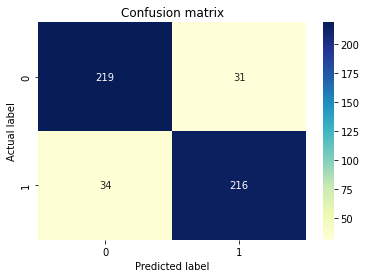

In [ ]:
xt=X.reshape(X.shape[0],1,X.shape[1])
model=Sequential()
model.add(CuDNNLSTM(units = 6, kernel_initializer = 'uniform', input_shape = (1,X.shape[1])))
# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(xt, y, batch_size = 100, epochs = 10)
y_pred = model.predict(testtransform.reshape(500,1,X.shape[1]))
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test['label'],y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test['label'], y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Epoch 1/10
585/585 [==============================] - 4s 5ms/step - loss: 0.4499 - accuracy: 0.8125
Epoch 2/10
585/585 [==============================] - 3s 5ms/step - loss: 0.2747 - accuracy: 0.8902
Epoch 3/10
585/585 [==============================] - 3s 4ms/step - loss: 0.2503 - accuracy: 0.9003
Epoch 4/10
585/585 [==============================] - 3s 4ms/step - loss: 0.2368 - accuracy: 0.9068
Epoch 5/10
585/585 [==============================] - 3s 4ms/step - loss: 0.2291 - accuracy: 0.9118
Epoch 6/10
585/585 [==============================] - 3s 5ms/step - loss: 0.2216 - accuracy: 0.9146
Epoch 7/10
585/585 [==============================] - 3s 5ms/step - loss: 0.2142 - accuracy: 0.9169
Epoch 8/10
585/585 [==============================] - 3s 5ms/step - loss: 0.2080 - accuracy: 0.9187
Epoch 9/10
585/585 [==============================] - 3s 4ms/step - loss: 0.1997 - accuracy: 0.9218
Epoch 10/10
16/16 [==============================] - 0s 2ms/step
              precision    recall  

Text(0.5, 15.0, 'Predicted label')

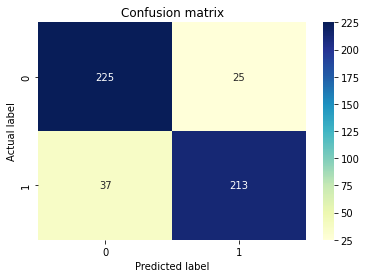

In [ ]:
model=Sequential()
model.add(Bidirectional(CuDNNLSTM(units = 6, kernel_initializer = 'uniform', input_shape = (1,X.shape[1]))))
# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(xt, y, batch_size = 101, epochs = 10)
y_pred = model.predict(testtransform.reshape(500,1,X.shape[1]))
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test['label'],y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test['label'], y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')